In [1]:
# Importing os module to interact with the native OS
import os

# Importing numpy library to perform a wide variety of mathematical operations on arrays
import numpy as np

# Importing pandas library to work with dataframes and gain access to many functions for performing data analysis in Python
import pandas as pd

# Importing cosine similarity to find the similarity between two non-zero vectors
from sklearn.metrics.pairwise import cosine_similarity

# Importing ast.literal_eval function to  to convert a string representation of a Python literal into the actual Python object
import ast
from ast import literal_eval

# Importing PorterStemmer to normalize to their base or root form
import nltk
from nltk.stem.porter import PorterStemmer

# Importing CountVectorizer to transform a set of text data into a numerical format that can be used as input
from sklearn.feature_extraction.text import CountVectorizer

# Importing train_test_split for splitting the data into training and testing sets
from sklearn.model_selection import train_test_split 

# Importing mean_squared_error for calculating mean squared error and mean_absolute_error
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Importing pearsonr for calculating Pearson correlation coefficient
from scipy.stats import pearsonr  

# Importing WordCloud for creating word clouds
from wordcloud import WordCloud

# Importing matplotlib.pyplot for creating plots and visualizations
import matplotlib.pyplot as plt

# Importing seaborn for statistical data visualization
import seaborn as sns

<h2> Content Based Recommender System </h2>

In [2]:
# Reading and storing the csv file that contains the movie metadata into a Pandas dataframe object "movie_data"
movie_data = pd.read_csv(r'C:\Users\Legion\Desktop\DATA\tmdb_5000_movies.csv')
movie_data.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [3]:
# Reading and storing the csv file that conatains the movie's cast and crew into a Pandas dataframe object "movie_cast"
movie_cast = pd.read_csv(r'C:\Users\Legion\Desktop\DATA\tmdb_5000_credits.csv')
movie_cast.head(2)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [4]:
# Merging the movies and credits dataframe
movies = movie_data.merge(movie_cast,on = 'title')
movies.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [5]:
# Choosing the approriate columns/features that would be used for the recommendation process
movies = movies[['movie_id','title','overview','genres','keywords', 'release_date','cast','crew']]
movies.head(2)

,movie_id,title,overview,genres,keywords,release_date,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",2009-12-10,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",2007-05-19,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [6]:
# Extracting only the year from released date and converting as vectorization only deals with strings
movies['release_date'] = movies['release_date'].str.extract('(\d{4})').astype(str)
movies.head(2)

,movie_id,title,overview,genres,keywords,release_date,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",2009,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",2007,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [7]:
# Extracting the total na values
movies.isna().sum()

movie_id        0
title           0
overview        3
genres          0
keywords        0
release_date    0
cast            0
crew            0
dtype: int64

In [8]:
# Removing the na values as the total values is only 3
movies.dropna(inplace=True)
movies.isna().sum()

movie_id        0
title           0
overview        0
genres          0
keywords        0
release_date    0
cast            0
crew            0
dtype: int64

In [9]:
# Checking for duplicate values
movies.duplicated().sum()

0

In [10]:
movies[['genres', 'keywords']].loc[0]

genres      [{"id": 28, "name": "Action"}, {"id": 12, "nam...
keywords    [{"id": 1463, "name": "culture clash"}, {"id":...
Name: 0, dtype: object

In [11]:
# Creating a function to extract the required keyword 
def keyword_extractor(text):
    L = []
    #ast.literal_eval function helps converting string of lists into list
    for i in ast.literal_eval(text):
        L.append(i['name']) 
    return L 
# Applying the created function to genres and keywords column to get the relevant keywords 
movies['genres'] = movies['genres'].apply(keyword_extractor)
movies['keywords'] = movies['keywords'].apply(keyword_extractor)
movies[['genres', 'keywords']].loc[0]

genres          [Action, Adventure, Fantasy, Science Fiction]
keywords    [culture clash, future, space war, space colon...
Name: 0, dtype: object

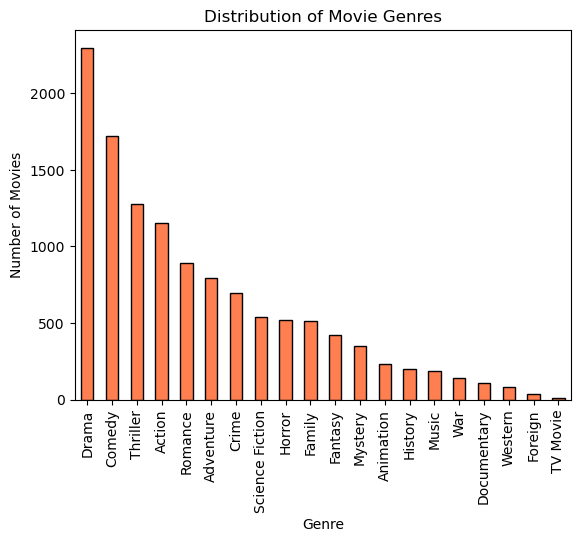

In [12]:
# Visually representing the total count of each genre in the dataset
genres = [genre for genres_list in movies['genres'] for genre in genres_list]
genre_counts = pd.Series(genres).value_counts()
genre_counts.plot(kind='bar', color='coral', edgecolor='black')
plt.title('Distribution of Movie Genres')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.show()

In [13]:
movies['cast'][0]

'[{"cast_id": 242, "character": "Jake Sully", "credit_id": "5602a8a7c3a3685532001c9a", "gender": 2, "id": 65731, "name": "Sam Worthington", "order": 0}, {"cast_id": 3, "character": "Neytiri", "credit_id": "52fe48009251416c750ac9cb", "gender": 1, "id": 8691, "name": "Zoe Saldana", "order": 1}, {"cast_id": 25, "character": "Dr. Grace Augustine", "credit_id": "52fe48009251416c750aca39", "gender": 1, "id": 10205, "name": "Sigourney Weaver", "order": 2}, {"cast_id": 4, "character": "Col. Quaritch", "credit_id": "52fe48009251416c750ac9cf", "gender": 2, "id": 32747, "name": "Stephen Lang", "order": 3}, {"cast_id": 5, "character": "Trudy Chacon", "credit_id": "52fe48009251416c750ac9d3", "gender": 1, "id": 17647, "name": "Michelle Rodriguez", "order": 4}, {"cast_id": 8, "character": "Selfridge", "credit_id": "52fe48009251416c750ac9e1", "gender": 2, "id": 1771, "name": "Giovanni Ribisi", "order": 5}, {"cast_id": 7, "character": "Norm Spellman", "credit_id": "52fe48009251416c750ac9dd", "gender": 

In [14]:
# Creating a function to extract the cast
def cast_extractor(text):
    cast_list = []
    for i in ast.literal_eval(text):
        if len(cast_list) < 5:
            cast_list.append(i['name'])
    return cast_list
movies['cast'] = movies['cast'].apply(cast_extractor)
movies['cast'][0]

['Sam Worthington',
 'Zoe Saldana',
 'Sigourney Weaver',
 'Stephen Lang',
 'Michelle Rodriguez']

In [15]:
movies['crew'][0]

'[{"credit_id": "52fe48009251416c750aca23", "department": "Editing", "gender": 0, "id": 1721, "job": "Editor", "name": "Stephen E. Rivkin"}, {"credit_id": "539c47ecc3a36810e3001f87", "department": "Art", "gender": 2, "id": 496, "job": "Production Design", "name": "Rick Carter"}, {"credit_id": "54491c89c3a3680fb4001cf7", "department": "Sound", "gender": 0, "id": 900, "job": "Sound Designer", "name": "Christopher Boyes"}, {"credit_id": "54491cb70e0a267480001bd0", "department": "Sound", "gender": 0, "id": 900, "job": "Supervising Sound Editor", "name": "Christopher Boyes"}, {"credit_id": "539c4a4cc3a36810c9002101", "department": "Production", "gender": 1, "id": 1262, "job": "Casting", "name": "Mali Finn"}, {"credit_id": "5544ee3b925141499f0008fc", "department": "Sound", "gender": 2, "id": 1729, "job": "Original Music Composer", "name": "James Horner"}, {"credit_id": "52fe48009251416c750ac9c3", "department": "Directing", "gender": 2, "id": 2710, "job": "Director", "name": "James Cameron"},

In [16]:
# Defining a function to extract the directors of the movies as directors are important features for the recommender system
def director_extractor(text):
    director_list = []
    for i in ast.literal_eval(text):
        if i['job'] == 'Director':
            director_list.append(i['name'])
    return director_list 
movies['director'] = movies['crew'].apply(director_extractor)
movies = movies.drop(columns=['crew'])
movies['director'][0]

['James Cameron']

In [17]:
movies.head(3)

,movie_id,title,overview,genres,keywords,release_date,cast,director
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...",2009,"[Sam Worthington, Zoe Saldana, Sigourney Weave...",[James Cameron]
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...",2007,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...",[Gore Verbinski]
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...",2015,"[Daniel Craig, Christoph Waltz, Léa Seydoux, R...",[Sam Mendes]


In [18]:
# Defining a function to remove spaces
def remove_space(L):
    L1 = []
    for i in L:
        L1.append(i.replace(" ",""))
    return L1
# Applying the created function in all the columns
movies['cast'] = movies['cast'].apply(remove_space)
movies['director'] = movies['director'].apply(remove_space)
movies['genres'] = movies['genres'].apply(remove_space)
movies['keywords'] = movies['keywords'].apply(remove_space)
movies['overview'] = movies['overview'].apply(lambda x:x.split()) #column is converted from a column of strings to a column of lists
movies.head(2)

,movie_id,title,overview,genres,keywords,release_date,cast,director
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...",2009,"[SamWorthington, ZoeSaldana, SigourneyWeaver, ...",[JamesCameron]
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...",2007,"[JohnnyDepp, OrlandoBloom, KeiraKnightley, Ste...",[GoreVerbinski]


In [19]:
# Combining the features and converting the release_date to list for concatenation
movies['combined_features'] = movies['overview'] + movies['genres'] + movies['keywords'] +  movies['release_date'].apply(lambda x: [x]) + movies['cast'] + movies['director']
movies = movies.drop(columns=['overview','genres', 'release_date', 'keywords','cast','director'])
movies.head(2)

,movie_id,title,combined_features
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d..."


In [20]:
# Converting the list in combined_features to string and lower case
movies['combined_features'] = movies['combined_features'].apply(lambda x: " ".join(x))
movies['combined_features'] = movies['combined_features'].apply(lambda x: x.lower())
movies['combined_features'][0]

'in the 22nd century, a paraplegic marine is dispatched to the moon pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. action adventure fantasy sciencefiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d 2009 samworthington zoesaldana sigourneyweaver stephenlang michellerodriguez jamescameron'

In [21]:
# Defining a function to normalize words to their base or root form to avoid multiple words with similar meaning
ps = PorterStemmer() #creating an object of class PorterStemmer
def stem(text):
    L2 = []
    for i in text.split():
        L2.append(ps.stem(i))
    return " ".join(L2)
movies['combined_features'] = movies['combined_features'].apply(stem)
movies['combined_features'][0]

'in the 22nd century, a parapleg marin is dispatch to the moon pandora on a uniqu mission, but becom torn between follow order and protect an alien civilization. action adventur fantasi sciencefict cultureclash futur spacewar spacecoloni societi spacetravel futurist romanc space alien tribe alienplanet cgi marin soldier battl loveaffair antiwar powerrel mindandsoul 3d 2009 samworthington zoesaldana sigourneyweav stephenlang michellerodriguez jamescameron'

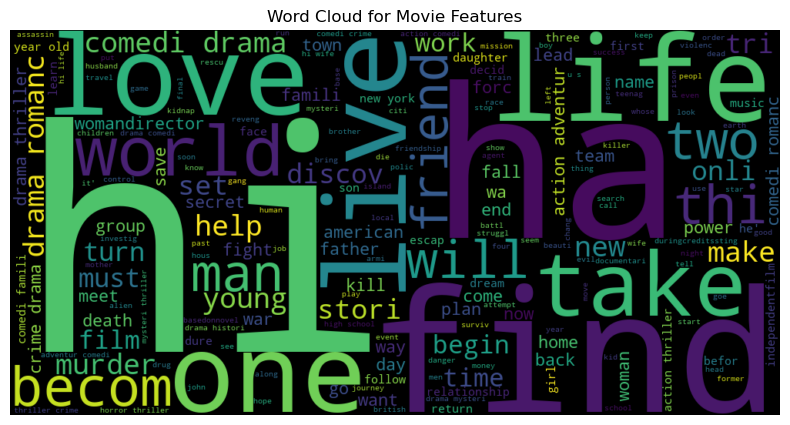

In [22]:
# Visually representing the most frequent words in movie overviews
wordcloud = WordCloud(width=1000, height=500, background_color='black').generate(' '.join(movies['combined_features']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Movie Features')
plt.show()

In [23]:
# Creating a CountVectorizer with a maximum of 3500 features and excluding common English stop words
cv = CountVectorizer(max_features=3500, stop_words='english')

# Transforming the combined features of movies into a numerical matrix using CountVectorizer
vector = cv.fit_transform(movies['combined_features']).toarray()

# Calculating cosine similarity between movies based on the transformed numerical matrix
content_based_similarity = cosine_similarity(vector)

# Displaying the cosine similarity of the first movie with all other movies
print(content_based_similarity[0])

[1.         0.08333333 0.08980265 ... 0.04811252 0.         0.        ]


In [24]:
# Creating a function to recommend similar movies based on their content using cosine distance(angle between two vectors)
def content_based_recommender(movie):
    # Finding the index of the target movie in the 'movies' DataFrame
    index = movies[movies['title'] == movie].index[0]
    
    # Calculating the cosine similarity between the target movie and all other movies
    distances = sorted(list(enumerate(content_based_similarity[index])), reverse=True, key=lambda x: x[1])
    
    # Iterating over the sorted similarity scores (excluding the target movie itself)
    for i in distances[1:7]:
        # Print the titles of the top 6 most similar movies
        print(movies.iloc[i[0]].title)

In [25]:
content_based_recommender('Sherlock Holmes')

Sherlock Holmes: A Game of Shadows
Silver Medalist
All Good Things
Die Hard: With a Vengeance
Murder by Numbers
Se7en


<h2> User-based Collaborative Recommender System </h2>

In [26]:
# Reading and stoting the csv file that contains the movie metadata into a Pandas dataframe object "movie_data2"
movie_data2 = pd.read_csv(r'C:\Users\Legion\Desktop\DATA\movies_metadata.csv', low_memory=False)
movie_data2.head(2)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0


In [27]:
# Reading and storing the csv file that is used to link the movies and ratings dataset
link_data = pd.read_csv(r'C:\Users\Legion\Desktop\DATA\links_small.csv')
link_data.head(2)

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0


In [28]:
# Reading and storing the csv file that contains the user and ratings into a Pandas dataframe object "user_data"
user_data = pd.read_csv(r'C:\Users\Legion\Desktop\DATA\ratings_small.csv')
user_data.head(2)

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179


In [29]:
# Merging the ratings and linking dataset first
user_data = user_data.merge(link_data, on = 'movieId')
user_data.head(2)

,userId,movieId,rating,timestamp,imdbId,tmdbId
0,1,31,2.5,1260759144,112792,9909.0
1,7,31,3.0,851868750,112792,9909.0


In [30]:
user_data.rename(columns={'movieId': 'id'}, inplace=True)
user_data.head(2)

,userId,id,rating,timestamp,imdbId,tmdbId
0,1,31,2.5,1260759144,112792,9909.0
1,7,31,3.0,851868750,112792,9909.0


In [31]:
movie_data2['id'] = pd.to_numeric(movie_data2['id'], errors='coerce')

# Drop rows with NaN in 'id' column
movie_data2.dropna(subset=['id'], inplace=True)

# Convert 'id' column to int
movie_data2['id'] = movie_data2['id'].astype(int)

# Merging the ratings dataset with movies dataset
user_ratings = movie_data2.merge(user_data, on='id')
user_ratings.head(2)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,tagline,title,video,vote_average,vote_count,userId,rating,timestamp,imdbId,tmdbId
0,False,NaN,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",...,A Los Angeles Crime Saga,Heat,False,7.7,1886.0,23,3.5,1148721092,48028,220.0
1,False,NaN,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",...,A Los Angeles Crime Saga,Heat,False,7.7,1886.0,102,4.0,956598942,48028,220.0


In [32]:
# Only keeping relevant columns
user_ratings = user_ratings[['id', 'title', 'userId', 'rating']]
user_ratings.head(2)

,id,title,userId,rating
0,949,Heat,23,3.5
1,949,Heat,102,4.0


In [33]:
# Displaying the shape of the merged dataset
num_rows, num_columns = user_ratings.shape

print(f'The DataFrame "user_ratings" has {num_rows} rows and {num_columns} columns.')

The DataFrame "user_ratings" has 44994 rows and 4 columns.


In [34]:
# Extracting the total na values
user_ratings.isna().sum()

id        0
title     0
userId    0
rating    0
dtype: int64

In [35]:
# Checking for duplicate values
user_ratings.duplicated().sum()

5

In [36]:
user_ratings = user_ratings.drop_duplicates()
user_ratings.duplicated().sum()

0

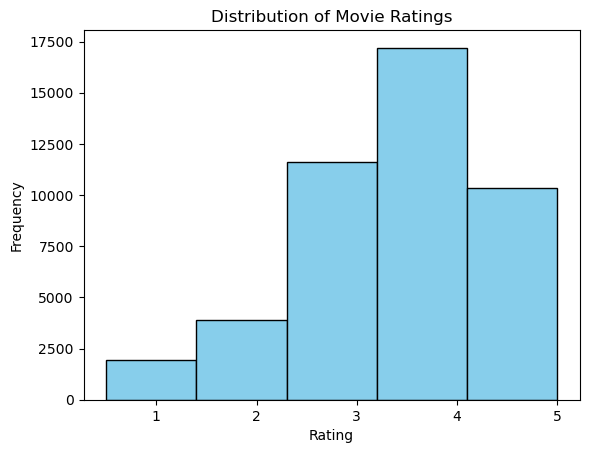

In [37]:
# Visualizing the distribution of movie ratings in the dataset.
plt.hist(user_ratings['rating'], bins=5, color= 'skyblue', edgecolor='black')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

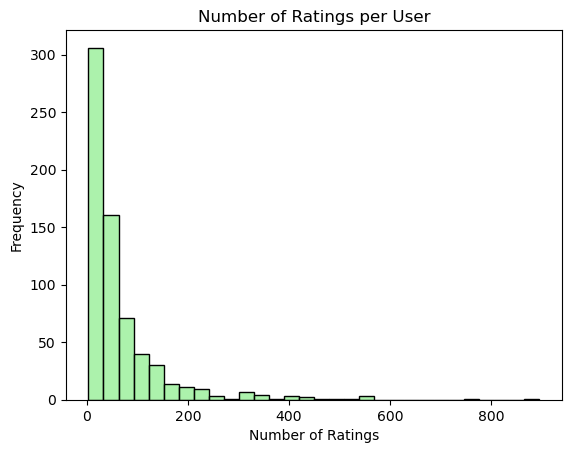

In [38]:
# Visualizing the number of ratings each user has given.
user_ratings_count = user_ratings.groupby('userId').size().reset_index(name='ratings_count')
sns.histplot(user_ratings_count['ratings_count'], color ='lightgreen' , bins=30)
plt.title('Number of Ratings per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.show()

In [39]:
# Selecting those users who have made a minimum of 250 ratings
temp = user_ratings.groupby('userId').count()['rating'] >= 250
experienced_users = temp[temp].index

In [40]:
# Keeping only the experienced users in the dataframe
users_with_enough_ratings = user_ratings[user_ratings['userId'].isin(experienced_users)]
users_with_enough_ratings

,id,title,userId,rating
0,949,Heat,23,3.5
1,949,Heat,102,4.0
2,949,Heat,232,2.0
5,949,Heat,311,3.0
8,949,Heat,452,4.5
...,...,...,...,...
44983,3104,Frankenstein Created Woman,509,5.0
44984,3104,Frankenstein Created Woman,518,5.0
44985,3104,Frankenstein Created Woman,547,5.0
44987,3104,Frankenstein Created Woman,624,4.0


In [41]:
# Selecting those movies which have been rated at least 25 times
temp1 = users_with_enough_ratings.groupby('title').count()['rating'] >= 25
popular_movies = temp1[temp1].index

In [42]:
# Keeping only the movies that have been rated at least 25 times in the dataframe
user_movie_ratings = users_with_enough_ratings[users_with_enough_ratings['title'].isin(popular_movies)]
user_movie_ratings

,id,title,userId,rating
3230,260,The 39 Steps,15,5.0
3237,260,The 39 Steps,23,4.5
3240,260,The 39 Steps,30,4.0
3258,260,The 39 Steps,73,4.5
3275,260,The 39 Steps,102,5.0
...,...,...,...,...
43045,457,Sissi,547,4.0
43054,457,Sissi,564,4.0
43057,457,Sissi,575,5.0
43071,457,Sissi,624,4.0


In [43]:
# Splitting the data into training and testing sets
train_data, test_data = train_test_split(user_movie_ratings, test_size=0.2, random_state=42)

In [44]:
# Creating a user-movie matrix for training and testing sets
train_matrix = train_data.pivot_table(index='userId', columns='title', values='rating', fill_value=0)
test_matrix = test_data.pivot_table(index='userId', columns='title', values='rating', fill_value=0)

In [45]:
# Calculating user-user similarity using cosine similarity for the training set
train_user_similarity = cosine_similarity(train_matrix)

In [46]:
# Convert the similarity matrix to a DataFrame for better readability
train_user_similarity_df = pd.DataFrame(train_user_similarity, index=train_matrix.index, columns=train_matrix.index)
train_user_similarity_df

userId,15,23,30,73,102,119,212,213,232,294,...,468,472,509,518,547,564,575,580,624,654
userId,,,,,,,,,,,,,,,,,,,,,
15,1.000000,0.733925,0.781647,0.779683,0.766630,0.773014,0.810184,0.717116,0.706313,0.701729,...,0.791716,0.818488,0.706674,0.717255,0.722985,0.614710,0.684071,0.737465,0.877372,0.758121
23,0.733925,1.000000,0.648589,0.683608,0.669987,0.814765,0.694703,0.654933,0.658930,0.495104,...,0.730487,0.638731,0.635090,0.740276,0.746048,0.639292,0.558298,0.765032,0.753093,0.750633
30,0.781647,0.648589,1.000000,0.782647,0.677255,0.758123,0.857824,0.579739,0.689455,0.549286,...,0.757364,0.634156,0.741205,0.655845,0.725213,0.481260,0.657128,0.803574,0.803014,0.734172
73,0.779683,0.683608,0.782647,1.000000,0.707958,0.801174,0.686380,0.676058,0.659643,0.606885,...,0.847514,0.604090,0.760703,0.656423,0.726162,0.542174,0.519575,0.800010,0.756495,0.799438
102,0.766630,0.669987,0.677255,0.707958,1.000000,0.764019,0.537291,0.441603,0.629566,0.395134,...,0.697467,0.719841,0.627048,0.604599,0.595108,0.479242,0.546353,0.575336,0.670564,0.614080
119,0.773014,0.814765,0.758123,0.801174,0.764019,1.000000,0.665641,0.594692,0.799513,0.523315,...,0.808342,0.620146,0.770921,0.678590,0.764946,0.696364,0.567223,0.758946,0.789976,0.726359
212,0.810184,0.694703,0.857824,0.686380,0.537291,0.665641,1.000000,0.613531,0.741728,0.623737,...,0.754279,0.754114,0.620920,0.660740,0.828511,0.517189,0.710949,0.884650,0.836791,0.711589
213,0.717116,0.654933,0.579739,0.676058,0.441603,0.594692,0.613531,1.000000,0.547477,0.699896,...,0.720930,0.613285,0.625415,0.726345,0.544534,0.659484,0.687939,0.624543,0.752172,0.882654
232,0.706313,0.658930,0.689455,0.659643,0.629566,0.799513,0.741728,0.547477,1.000000,0.607009,...,0.779601,0.646138,0.608889,0.729472,0.703922,0.594577,0.567477,0.792790,0.796565,0.660726


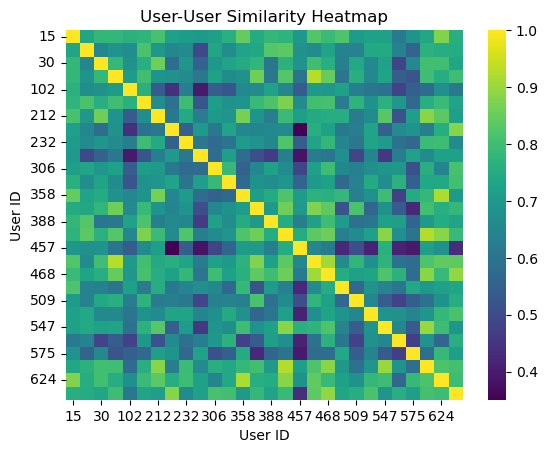

In [47]:
# Visualizing the user-user similarity matrix as a heatmap to identify patterns of similarity.
sns.heatmap(train_user_similarity_df, cmap='viridis')
plt.title('User-User Similarity Heatmap')
plt.xlabel('User ID')
plt.ylabel('User ID')
plt.show()

In [48]:
# Creating a recommender method based on similar users 
def user_based_recommender(user_id):
    top_n = 6  # Hardcoded value for top recommendations
    # Getting similarity between the target user and all other users
    user_similarity_scores = train_user_similarity_df.loc[user_id]

    # Finding users most similar to the target user
    similar_users = user_similarity_scores.sort_values(ascending=False).index[1:]

    # Getting movies the target user has not seen
    unseen_movies = train_matrix.loc[user_id] == 0

    # Recommending movies based on similar users by adding similarity with ratings
    recommended_movies = train_matrix.loc[similar_users, unseen_movies].sum(axis=0)

    # Sorting recommended movies by predicted rating
    recommended_movies = recommended_movies.sort_values(ascending=False)

    # Getting top N recommended movies (titles only)
    top_recommendations = recommended_movies.head(top_n).index.tolist()

    # Printing the recommendations
    for movie_title in top_recommendations:
        print(movie_title)

In [49]:
# Recommending movies to user with id 30
user_based_recommender(30)

The 39 Steps
Superstar: The Karen Carpenter Story
Monsoon Wedding
Dr. Jekyll and Mr. Hyde
Titanic
All the Way Boys


In [50]:
# Function to predict the rating based on user similarity
def predict_rating(user_id, movie_title):
    # Find similar users based on cosine similarity
    similar_users = train_user_similarity_df.loc[user_id].sort_values(ascending=False).index[1:]
    
    # Get the ratings of similar users for the target movie
    user_ratings = train_matrix.loc[similar_users, movie_title]
    
    # Exclude None values from user_ratings
    user_ratings = user_ratings.dropna()
    
    if user_ratings.empty:
        # If no ratings are available, return None
        return None
    
    # Calculate weighted ratings based on similarity scores by multiplying ratings of similar user with their similarity score
    weighted_ratings = user_ratings * train_user_similarity_df.loc[user_id, similar_users]
    
    # Predict the rating for the target user and movie
    predicted_rating = weighted_ratings.sum() / abs(train_user_similarity_df.loc[user_id, similar_users]).sum() #find absolute similarity scores
        
    return predicted_rating

In [51]:
# Function to evaluate the recommender system
def evaluate_recommender():
    # Lists to store predicted and true ratings
    predicted_ratings = []
    true_ratings = []

    # Loop through each user in the test set
    for user_id in test_matrix.index:
        # Get the true ratings for the user
        true_user_ratings = test_matrix.loc[user_id, test_matrix.loc[user_id] > 0]

        # Predict ratings for movies the user has rated
        predicted_user_ratings = np.array([predict_rating(user_id, movie_title) for movie_title in true_user_ratings.index])

        # Append true and predicted ratings to the arrays
        true_ratings.extend(true_user_ratings)
        predicted_ratings.extend(predicted_user_ratings)

    # Convert lists to NumPy arrays for efficient calculations
    true_ratings = np.array(true_ratings)
    predicted_ratings = np.array(predicted_ratings)

    # Calculate metrics
    mse = mean_squared_error(true_ratings, predicted_ratings)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(true_ratings, predicted_ratings)
    pearson_corr, _ = pearsonr(true_ratings, predicted_ratings)

    # Print the evaluation metrics
    print(f'Mean Squared Error (MSE): {mse}')
    print(f'Root Mean Squared Error (RMSE): {rmse}')
    print(f'Mean Absolute Error (MAE): {mae}')
    print(f'Pearson Correlation Coefficient: {pearson_corr}')

In [52]:
# Evaluating the User-Based Collaborative Recommender
evaluate_recommender()

Mean Squared Error (MSE): 2.1716467459681352
Root Mean Squared Error (RMSE): 1.4736508222669762
Mean Absolute Error (MAE): 1.3040138897581193
Pearson Correlation Coefficient: 0.304872455102488


<h2> Hybrid Recommender System </h2>

In [53]:
def hybrid_recommender(user_id, movie_title, content_weight=0.65, collab_weight=0.35):
    try:
        # Content-based recommendation
        index_content = movies[movies['title'] == movie_title].index[0]  # Getting the index of the movie in the content-based similarity matrix
        distances_content = sorted(list(enumerate(content_based_similarity[index_content])), reverse=True, key=lambda x: x[1])  # Calculating similarity scores for content-based recommendation
        content_based_recommendations = [movies.iloc[distances_content[i][0]].title for i in range(1, 5)]  # Extracting recommended movies based on content

        # Collaborative-based recommendation
        user_similarity_scores = train_user_similarity_df.loc[user_id]  # Getting similarity scores for the target user
        similar_users = user_similarity_scores.sort_values(ascending=False).index[1:]  # Finding users with similar preferences
        unseen_movies = train_matrix.loc[user_id] == 0  # Identifying movies not yet rated by the target user
        recommended_movies_collab = train_matrix.loc[similar_users, unseen_movies].sum(axis=0)  # Sum ratings of similar users for unrated movies
        recommended_movies_collab = recommended_movies_collab.sort_values(ascending=False)  # Sorting by summed ratings
        collaborative_recommendations = [title for title in recommended_movies_collab.index[:2]]  # Extracting collaborative-based recommendations

        # Assigning scores to recommended items based on their position in the lists
#        content_scores = {title: i for i, title in enumerate(content_based_recommendations, start=1)}  # Assigning scores based on content-based recommendations
        content_scores = {title: len(content_based_recommendations) - i + 1 for i, title in enumerate(content_based_recommendations, start=1)}
        collab_scores = {title: len(collaborative_recommendations) - i + 1 for i, title in enumerate(collaborative_recommendations, start=1)}  # Assigning scores based on collaborative-based recommendations

        # Combining scores with weightage
        hybrid_scores = {title: content_weight * content_scores.get(title, 0) + collab_weight * collab_scores.get(title, 0)
                         for title in set(content_scores) | set(collab_scores)}  # Combining scores using specified weightage

        # Sort items by combined scores
        hybrid_recommendations = sorted(hybrid_scores.keys(), key=lambda x: hybrid_scores[x], reverse=True)  # Sorting items based on combined scores

        # Return the combined recommendations
        return hybrid_recommendations[:6]  # Returning the top 6 recommendations
    except (IndexError, KeyError):
        print("Error: Invalid movie title or user ID.")
        return None


In [54]:
# Setting user_id and movie_title for the recommender
user_id = 30
movie_title = 'Sherlock Holmes'

# Calling the hybrid recommender function to get recommendations
hybrid_recommendations = hybrid_recommender(user_id, movie_title)

# Displaying the combined recommendations if they exist
if hybrid_recommendations:
    # Printing a header for the recommendations
    print(f"Hybrid Recommender Recommendations for '{movie_title}' and User ID {user_id}: \n")
    
    # Iterat over the recommended movie titles and print each one
    for title in hybrid_recommendations:
        print(title)

Hybrid Recommender Recommendations for 'Sherlock Holmes' and User ID 30: 

Sherlock Holmes: A Game of Shadows
Silver Medalist
All Good Things
The 39 Steps
Die Hard: With a Vengeance
Superstar: The Karen Carpenter Story
